In [5]:
from ultralytics import YOLO
model = YOLO("../TrainingCodes/runs/classify/yolo11m-cls_datasetv2/weights/best.pt") 
HNmodel=YOLO("../TrainingCodes/runs/classify/yolo11m-cls_Hiperakut-Normalv2/weights/best.pt")
HSmodel=YOLO("../TrainingCodes/runs/classify/yolo11m-cls_Hiperakut-Subakutv2/weights/best.pt")
NSmodel=YOLO("../TrainingCodes/runs/classify/yolo11m-cls_Normal-Subakutv2/weights/best.pt")

read_dir="../Yolo/Topluv2/val"
output_dir="./val_results"


image 1/1 c:\Users\alt_user\Documents\GitHub\Teknofest25_AI_in_Medicine_Competition\2\DoubleModel\..\Yolo\Topluv2\val\HiperakutAkut\Vaka_300663_50467107.2.19_HiperakutAkut.png: 224x224 HiperakutAkut 1.00, NormalKronik 0.00, Subakut 0.00, 22.4ms
Speed: 1.9ms preprocess, 22.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
True label: HiperakutAkut, Predicted: HiperakutAkut

image 1/1 c:\Users\alt_user\Documents\GitHub\Teknofest25_AI_in_Medicine_Competition\2\DoubleModel\..\Yolo\Topluv2\val\HiperakutAkut\Vaka_300663_50467107.4.0_HiperakutAkut.png: 224x224 HiperakutAkut 0.99, NormalKronik 0.00, Subakut 0.00, 21.6ms
Speed: 2.4ms preprocess, 21.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
True label: HiperakutAkut, Predicted: HiperakutAkut

image 1/1 c:\Users\alt_user\Documents\GitHub\Teknofest25_AI_in_Medicine_Competition\2\DoubleModel\..\Yolo\Topluv2\val\HiperakutAkut\Vaka_302619_50478756.3.11_HiperakutAkut.png: 224x224 HiperakutAkut 0.92, Subak

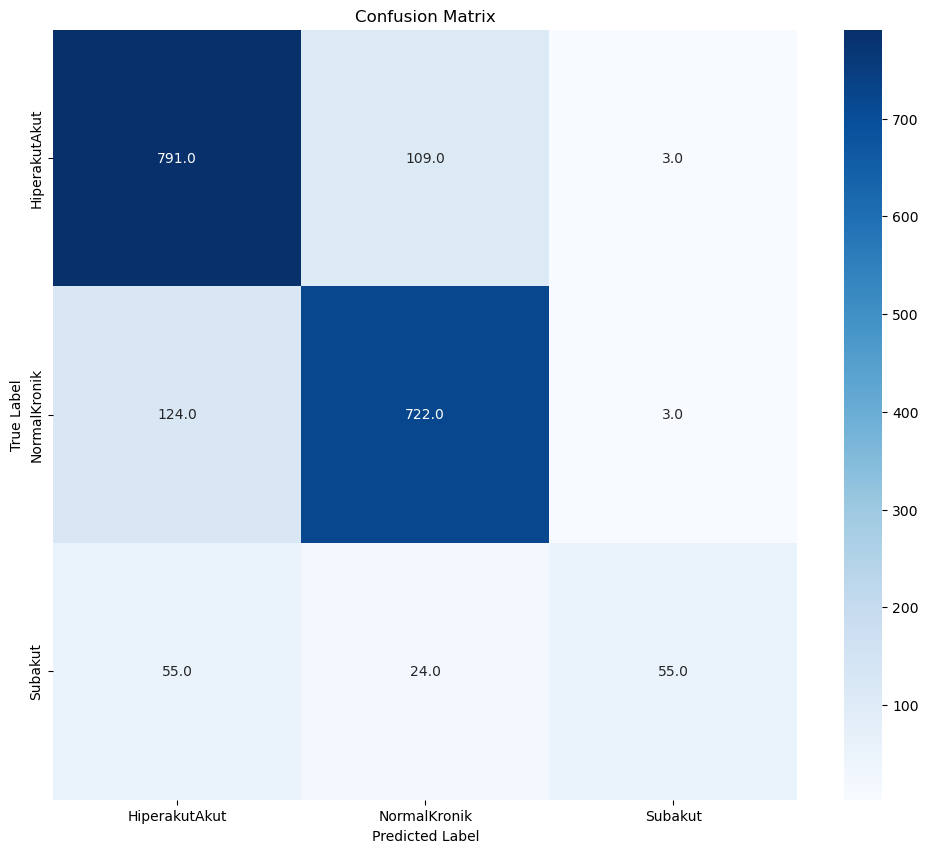

In [6]:
from ultralytics import YOLO
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import shutil
from pathlib import Path
import os
IMAGE_EXTENSIONS = {'.png'}

def read_images(root_dir):
    root = Path(root_dir)
    for path in root.rglob('*'):
        if path.suffix.lower() in IMAGE_EXTENSIONS:
            yield path

T = 0
F = 0

# Lists to store true and predicted labels for the confusion matrix
all_true_labels = []
all_pred_labels = []
class_names = list(model.names.values()) # Get class names from the main model

# Usage
for path in read_images(read_dir):
    if "CT" in str(path):
        continue

    label = path.stem.split("_")[-1]
    all_true_labels.append(label)

    result = model.predict(source=path, save=False)
    result = result[0]
    pred = result.probs.top1
    predlabel = result.names[pred]
    conf = result.probs.top1conf
    newResult = None

    if conf < 0.9:
        second_hit_label = result.names[result.probs.top5[1]]
        if (predlabel == "HiperakutAkut" and second_hit_label == "NormalKronik") or \
           (predlabel == "NormalKronik" and second_hit_label == "HiperakutAkut"):
            newResult = HNmodel.predict(source=path, save=False)
            newResult = newResult[0]
        elif (predlabel == "HiperakutAkut" and second_hit_label == "Subakut") or \
             (predlabel == "Subakut" and second_hit_label == "HiperakutAkut"):
            newResult = HSmodel.predict(source=path, save=False)
            newResult = newResult[0]
        elif (predlabel == "NormalKronik" and second_hit_label == "Subakut") or \
             (predlabel == "Subakut" and second_hit_label == "NormalKronik"):
            newResult = NSmodel.predict(source=path, save=False)
            newResult = newResult[0]

    final_pred_label = ""
    if newResult is None:
        final_pred_label = result.names[pred]
        if final_pred_label.lower() == label.lower():
            T += 1
        else:
            F += 1
        print(f"True label: {label}, Predicted: {final_pred_label}")
    else:
        pred = newResult.probs.top1
        final_pred_label = newResult.names[pred]
        if final_pred_label.lower() == label.lower():
            T += 1
        else:
            F += 1
        print(f"True label: {label}, Predicted: {final_pred_label}")
        print(f"First hit: {result.names[result.probs.top1]}, Second hit: {final_pred_label}, First hit conf {result.probs.top1conf}, Second hit conf: {newResult.probs.top1conf}")

    all_pred_labels.append(final_pred_label)

print(f"True: {T}, False: {F}")
print(f"Accuracy: {T / (T + F) * 100:.2f}%")

# --- New Code for Confusion Matrix ---

# Ensure all class names are present for matrix calculation
all_labels = sorted(list(set(all_true_labels + all_pred_labels)))

# Calculate the confusion matrix
cm = confusion_matrix(all_true_labels, all_pred_labels, labels=all_labels)
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create the plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save the plot
plt.savefig('confusion_matrix.png', dpi=300)
print("\nConfusion matrix saved to confusion_matrix.png")


Confusion matrix saved to confusion_matrix.png


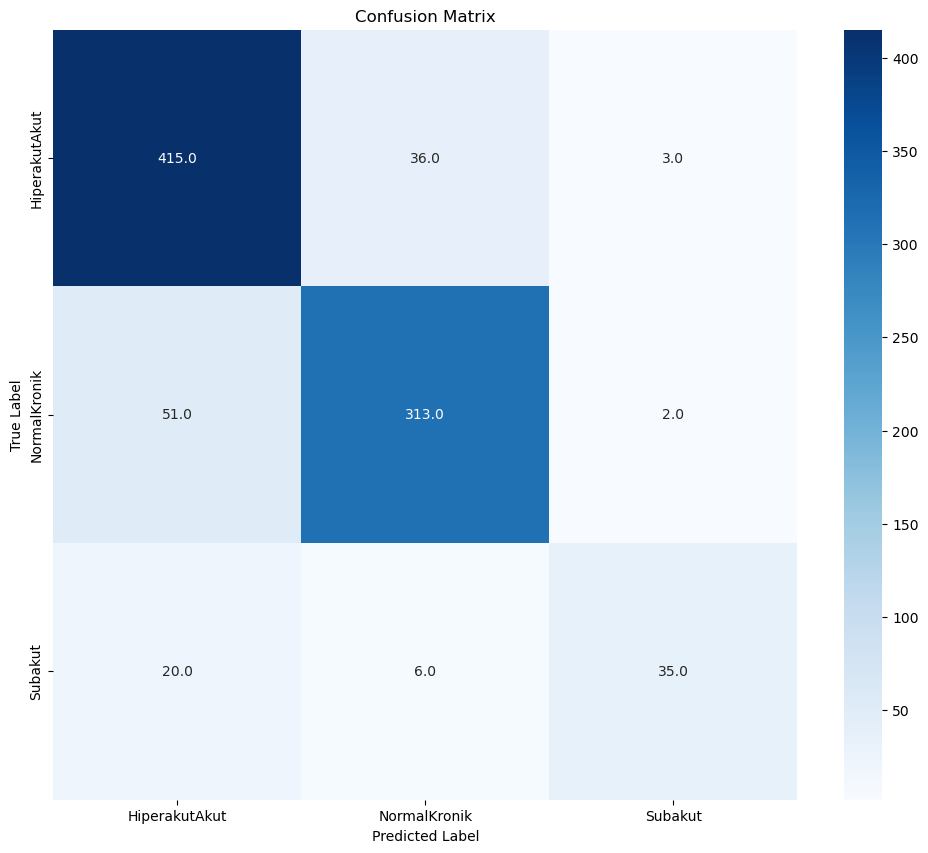

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save the plot
plt.savefig('confusion_matrix.png', dpi=300)
print("\nConfusion matrix saved to confusion_matrix.png")


image 1/1 c:\Users\alt_user\Desktop\Teknofest25Veri\DoubleModel\..\Yolo\Toplu\val\HiperakutAkut\Vaka_300663_50467107.2.19_HiperakutAkut.png: 224x224 HiperakutAkut 1.00, Subakut 0.00, NormalKronik 0.00, 22.0ms
Speed: 3.1ms preprocess, 22.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
True label: HiperakutAkut, Predicted: HiperakutAkut

image 1/1 c:\Users\alt_user\Desktop\Teknofest25Veri\DoubleModel\..\Yolo\Toplu\val\HiperakutAkut\Vaka_300663_50467107.4.0_HiperakutAkut.png: 224x224 HiperakutAkut 1.00, NormalKronik 0.00, Subakut 0.00, 22.3ms
Speed: 3.1ms preprocess, 22.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
True label: HiperakutAkut, Predicted: HiperakutAkut

image 1/1 c:\Users\alt_user\Desktop\Teknofest25Veri\DoubleModel\..\Yolo\Toplu\val\HiperakutAkut\Vaka_302619_50478756.3.11_HiperakutAkut.png: 224x224 Subakut 0.92, HiperakutAkut 0.08, NormalKronik 0.00, 21.9ms
Speed: 2.3ms preprocess, 21.9ms inference, 0.1ms postprocess per image at

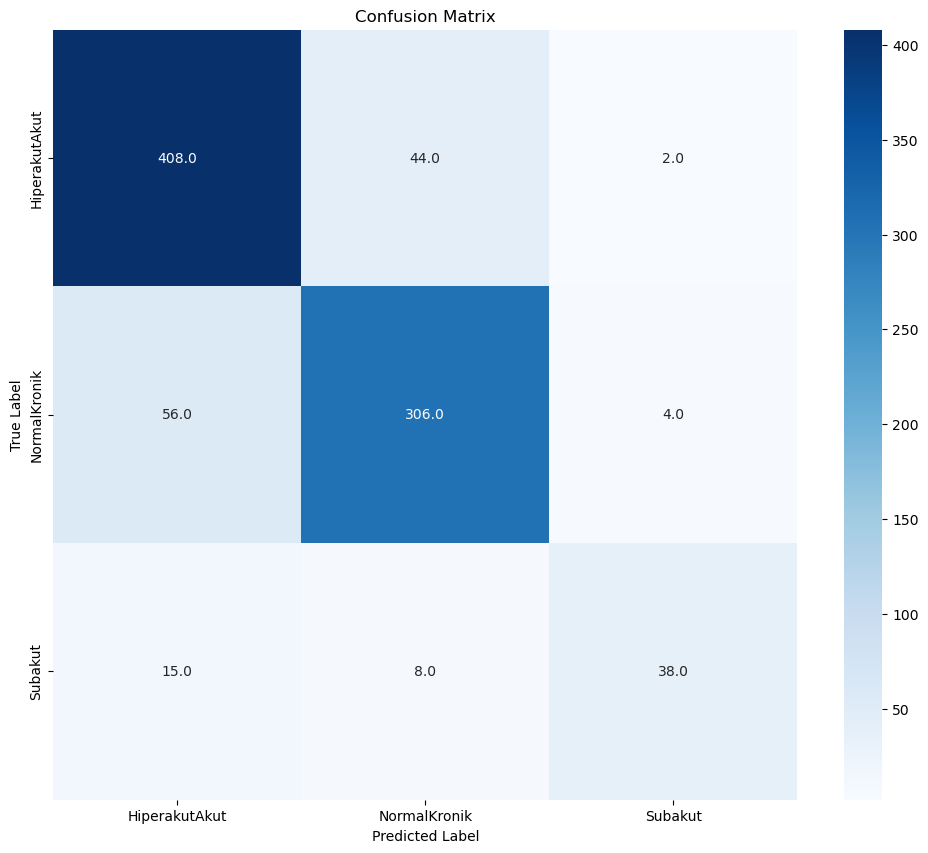

In [18]:
from ultralytics import YOLO
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import shutil
from pathlib import Path
import os


T = 0
F = 0

# Lists to store true and predicted labels for the confusion matrix
all_true_labels = []
all_pred_labels = []
class_names = list(model.names.values()) # Get class names from the main model

# Usage
for path in read_images(read_dir):
    if "CT" in str(path):
        continue

    label = path.stem.split("_")[-1]
    all_true_labels.append(label)

    result = model.predict(source=path, save=False)
    result = result[0]
    pred = result.probs.top1
    predlabel = result.names[pred]
    conf = result.probs.top1conf
    newResult = None

    final_pred_label = ""
    if newResult is None:
        final_pred_label = result.names[pred]
        if final_pred_label.lower() == label.lower():
            T += 1
        else:
            F += 1
        print(f"True label: {label}, Predicted: {final_pred_label}")
    else:
        pred = newResult.probs.top1
        final_pred_label = newResult.names[pred]
        if final_pred_label.lower() == label.lower():
            T += 1
        else:
            F += 1
        print(f"True label: {label}, Predicted: {final_pred_label}")
        print(f"First hit: {result.names[result.probs.top1]}, Second hit: {final_pred_label}, First hit conf {result.probs.top1conf}, Second hit conf: {newResult.probs.top1conf}")

    all_pred_labels.append(final_pred_label)

print(f"True: {T}, False: {F}")
print(f"Accuracy: {T / (T + F) * 100:.2f}%")

# --- New Code for Confusion Matrix ---

# Ensure all class names are present for matrix calculation
all_labels = sorted(list(set(all_true_labels + all_pred_labels)))

# Calculate the confusion matrix
cm = confusion_matrix(all_true_labels, all_pred_labels, labels=all_labels)
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create the plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save the plot
plt.savefig('confusion_matrix_non_hybrid.png', dpi=300)
print("\nConfusion matrix saved to confusion_matrix.png")